TRABAJO PRACTICO 3 - REDES NEURONALES - LUCAS PINI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.preprocessing as pre
import src.models as models

1. ANÁLISIS Y PREPROCESAMIENTO DE DATOS

1.1 Cargo los datasets y observo si coinciden los tamaños con los de la consigna

In [2]:
X_images = np . load ("data\X_images.npy")
y_images = np . load ("data\y_images.npy")

print(f"Forma de X_images: {X_images.shape}")
print(f"Forma de y_images: {y_images.shape}")
print(f"Número de clases: {len(np.unique(y_images))}")

Forma de X_images: (809555, 28, 28)
Forma de y_images: (809555,)
Número de clases: 47


1.2 Visualizacion de imagenes

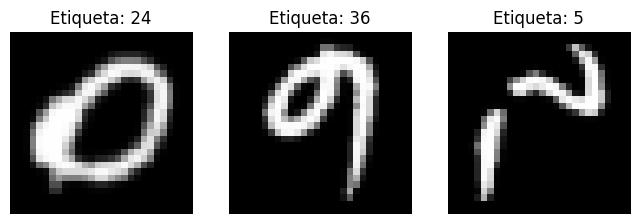

In [3]:

fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for i, ax in enumerate(axes):
    img = X_images[i].reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Etiqueta: {y_images[i]}")
    ax.axis("off")
plt.show()


1.3 Divido el dataset en Train, Validation y Test

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = pre.split_dataset(X_images, y_images)

print(f"Tamaño de Train: {X_train.shape[0]}")
print(f"Tamaño de Validation: {X_val.shape[0]}")
print(f"Tamaño de Test: {X_test.shape[0]}")

Tamaño de Train: 647644
Tamaño de Validation: 80955
Tamaño de Test: 80956


1.4 Normalización de los datos dividiendo por 255

In [5]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(f"Rango de X_train: {X_train.min():.3f} - {X_train.max():.3f}")


Rango de X_train: 0.000 - 1.000


1.5 Entrenamiento de una Red Neuronal con:

- 2 capas ocultas

- 128 y 64 neuronas

- ReLU en ocultas y Softmax en salida

- Función de costo: Cross-Entropy

- Entrenamiento con gradiente descendente

- Inicialización de parametros con He inicialization como recomienda el Bishop y biases en 0

In [6]:
# Supongamos que ya tenés X_train, y_train, X_val, y_val normalizados y cargados
# (cada imagen en un vector de 784 = 28x28)

num_classes = len(np.unique(y_train))
X_train_flat = X_train.reshape(X_train.shape[0], -1).T
X_val_flat   = X_val.reshape(X_val.shape[0], -1).T

Y_train_oh = pre.one_hot(y_train, num_classes)
Y_val_oh   = pre.one_hot(y_val, num_classes)

# === Definición del modelo M0 ===
dims = [784, 128, 64, num_classes]  # 2 capas ocultas

parametros_M0, losses_train, losses_val = models.entrenar_red_con_validacion(
    X_train_flat, Y_train_oh, X_val_flat, Y_val_oh,
    dims, epochs=10, lr=0.01
)


Época 1/100 | Loss Train: 4.0217 | Loss Val: 4.0237


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(losses_train, label="Entrenamiento", linewidth=2)
plt.plot(losses_val, label="Validación", linewidth=2)
plt.xlabel("Época")
plt.ylabel("Función de costo (Cross-Entropy)")
plt.title("Evolución del costo - Modelo M₀ (128-64-Softmax)")
plt.legend()
plt.grid(True)
plt.show()
